<a href="https://colab.research.google.com/github/aliefAdityaa/Muhammad-Alief-Aditya-2/blob/main/Praktikum_DATA_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Travel Insurance Prediction Data**





In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

**Library untuk Splitting Data**

In [16]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [17]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score


## Business Understanding
### Business Objective
Tujuan bisnis dari dataset ini adalah mengetahui peluang inovasi dan menggembangkan produk unggulan, serta menerapkan teknologi baru seperti AI dan IoT untuk meningkatkan pengalaman pelanggan.
### Assess Situation
Situasi yang mendasari dataset ini adalah melakukan evaluasi mendalam terhadap kualitas dataset, memastikan kepatuhan terhadap regulasi privasi, dan mengidentifikasi potensi risiko etika terkait penggunaan data.
### Tujuan Data Mining
Tujuan Data mining dari dataset Travel Insurance Prediction Data adalah menerapkan teknik data mining untuk mengidentifikasi segmen pelanggan yang potensial dan mengarahkan strategi pemasaran secara lebih efektif. Lalu, Menggunakan data mining untuk personalisasi layanan dan penawaran asuransi perjalanan berdasarkan preferensi pelanggan.
### Rencana Proyek
Tahapan-tahapan yang akan dilakukan adalah
1. Membersihkan dan mempersiapkan data untuk analisis, termasuk penanganan nilai-nilai yang hilang dan normalisasi.
2. Mengevaluasi dan memperbarui model prediktif yang ada, termasuk peningkatan kinerja dan interpretabilitas.
3. Menerapkan hasil analisis untuk mengoptimalkan strategi pemasaran, termasuk segmentasi pelanggan dan personalisasi pesan.
4. Menerapkan solusi untuk meningkatkan manajemen risiko, termasuk identifikasi dan mitigasi risiko potensial.
5. Melakukan evaluasi reguler terhadap performa model, strategi pemasaran, dan proses underwriting untuk memastikan keberlanjutan dan perbaikan berkelanjutan.


# **Data Understanding**

## **Collect Initial Data**

Dataset yang berasal dari Kaggle ini ialah Dataset yang berisi informasi terkait prediksi asuransi perjalanan. Informasi ini dapat mencakup berbagai variabel, seperti data pelanggan, rincian perjalanan, dan apakah asuransi perjalanan dibeli atau tidak. Berikut link dataset tersebut : https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data/data

In [19]:
df = pd.read_csv('/content/TravelInsurancePrediction.csv')
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


## **Describe Data**

### Informasi Dasar

In [20]:
print("Jumlah baris :", df.shape[0])
print("Jumlah kolom :", df.shape[1])

Jumlah baris : 1987
Jumlah kolom : 10


Dapat dilihat bahwasannya jumlah baris adalah berjumlah 1987 dan jumlah kolom adalah berjumlah 10.

### Informasi Lanjutan

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


KOLOM
1. Age = nilai usia pelanggan, jumlah = 1987, tipe data = integer
2. Employment Type = jenis pekerjaan atau tipe pekerjaan dari pelanggan, jumlah = 1987, tipe data = object
3. GraduateOrNot = berisi informasi apakah pelanggan lulus atau tidak lulus, jumlah = 1987, tipe data = object
4. AnnualIncome = nilai pendapatan tahunan pelanggan, jumlah = 1987, tipe data = integer
5. FamilyMembers =  jumlah anggota keluarga pelanggan, jumlah = 1987, tipe data = integer
6. ChronicDiseases = berisi informasi apakah pelanggan memiliki penyakit kronis atau tidak, jumlah = 1987, tipe data = integer
7. FrequentFlyer = berisi informasi apakah pelanggan sering terbang atau tidak, jumlah = 1987, tipe data = object
8. EverTravelledAbroad = berisi informasi apakah pelanggan pernah bepergian ke luar negeri atau tidak, jumlah = 1987, tipe data = object
9. TravelInsurance = berisi informasi apakah pelanggan membeli asuransi perjalanan atau tidak, jumlah = 1987, tipe data = integer

#### Informasi Statistik Deskriptif

In [22]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


1. Rata-rata usia adalah sekitar 29.65 tahun, dengan standar deviasi sekitar 2.91, menunjukkan sejauh mana data tersebar dari rata-rata.
2. Rata-rata pendapatan tahunan adalah sekitar 932,763, dengan variasi yang cukup signifikan (standar deviasi 376,855.7).
3. Rata-rata jumlah anggota keluarga adalah sekitar 4.75.
4. Sekitar 27.78% pelanggan memiliki penyakit kronis berdasarkan rata-rata.
5. Sekitar 35.73% pelanggan membeli asuransi perjalanan berdasarkan rata-rata.

## **Exploratory Data Analysis**

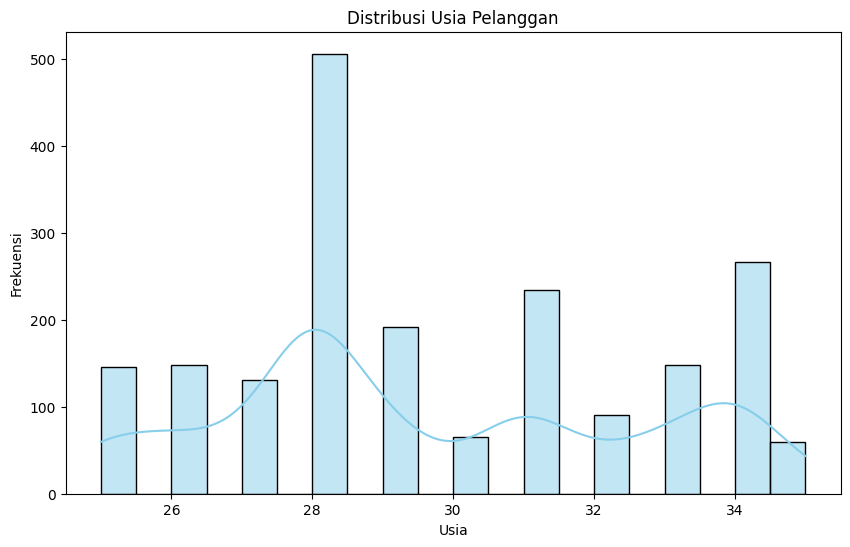

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

Sebagian besar pelanggan berada dalam rentang usia 25-35 tahun.

<ipython-input-24-502f55e73b18>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


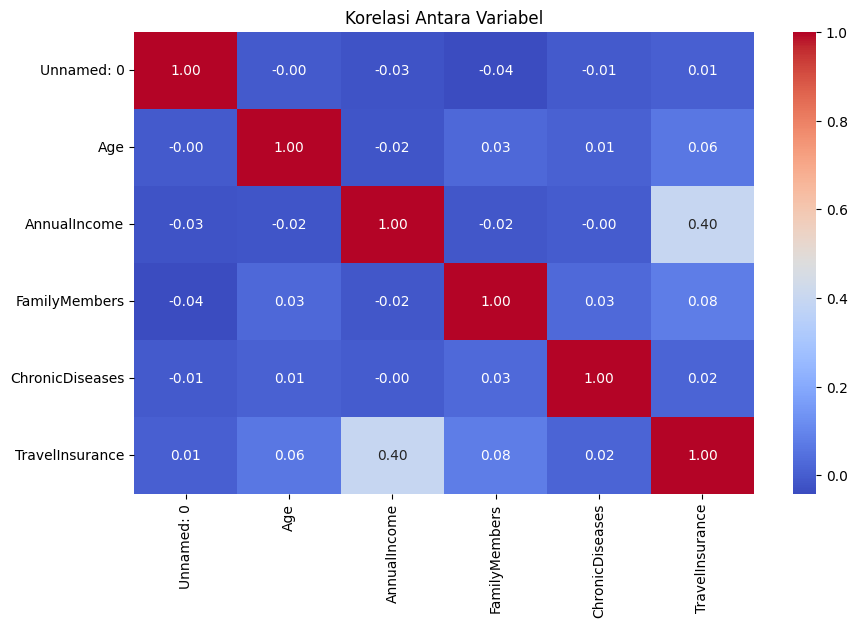

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antara Variabel')
plt.show()

Tidak ada korelasi yang kuat antara variabel-variabel numerik, menunjukkan bahwa fitur-fitur tersebut mungkin saling bebas.

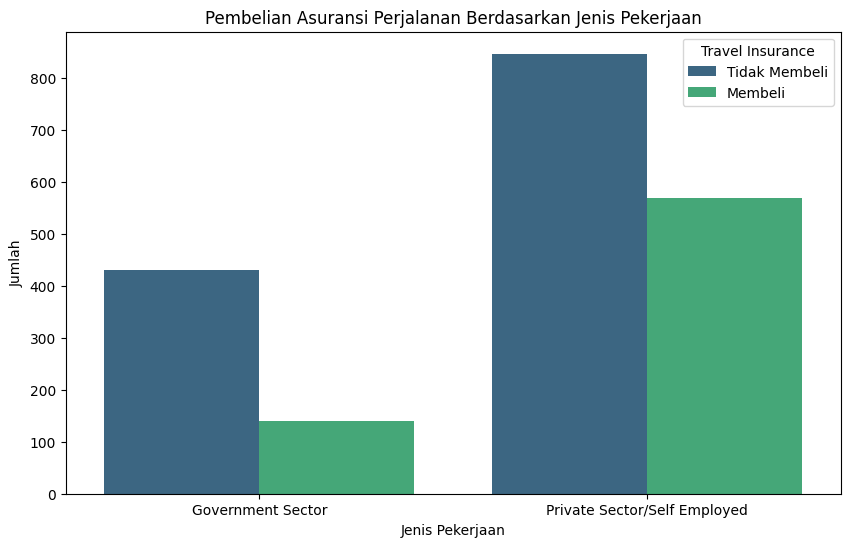

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Employment Type', hue='TravelInsurance', data=df, palette='viridis')
plt.title('Pembelian Asuransi Perjalanan Berdasarkan Jenis Pekerjaan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Jumlah')
plt.legend(title='Travel Insurance', loc='upper right', labels=['Tidak Membeli', 'Membeli'])
plt.show()

Pelanggan yang bekerja mungkin memiliki kecenderungan lebih tinggi untuk membeli asuransi perjalanan dibandingkan dengan pelanggan yang tidak bekerja.
Jenis pekerjaan dapat memainkan peran penting dalam keputusan pembelian asuransi perjalanan.

## **Verify Data Quality**

#### Missing Values

In [26]:
missing_values = df.isnull().sum()
print("Jumlah nilai kosong pada setiap kolom :")
print(missing_values)

Jumlah nilai kosong pada setiap kolom :
Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64


Age: Usia pelanggan, tidak ada nilai kosong.
Employment Type: Jenis pekerjaan pelanggan, tidak ada nilai kosong.
GraduateOrNot: Informasi apakah pelanggan lulus atau tidak, tidak ada nilai kosong.
AnnualIncome: Pendapatan tahunan pelanggan, tidak ada nilai kosong.
FamilyMembers: Jumlah anggota keluarga pelanggan, tidak ada nilai kosong.
ChronicDiseases: Informasi apakah pelanggan memiliki penyakit kronis, tidak ada nilai kosong.
FrequentFlyer: Informasi apakah pelanggan sering terbang atau tidak, tidak ada nilai kosong.
EverTravelledAbroad: Informasi apakah pelanggan pernah bepergian ke luar negeri, tidak ada nilai kosong.
TravelInsurance: Informasi apakah pelanggan membeli asuransi perjalanan, tidak ada nilai kosong.

#### Outliers Values

In [27]:
def detect_outliers(column):
    column = pd.to_numeric(column, errors='coerce')
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

for column in df.columns:
    outliers = detect_outliers(df[column])
    print(f"Kolom '{column}':")
    print(f"- Jumlah outliers: {len(outliers)}")

Kolom 'Unnamed: 0':
- Jumlah outliers: 0
Kolom 'Age':
- Jumlah outliers: 0
Kolom 'Employment Type':
- Jumlah outliers: 0
Kolom 'GraduateOrNot':
- Jumlah outliers: 0
Kolom 'AnnualIncome':
- Jumlah outliers: 0
Kolom 'FamilyMembers':
- Jumlah outliers: 0
Kolom 'ChronicDiseases':
- Jumlah outliers: 0
Kolom 'FrequentFlyer':
- Jumlah outliers: 0
Kolom 'EverTravelledAbroad':
- Jumlah outliers: 0
Kolom 'TravelInsurance':
- Jumlah outliers: 0


Age: Usia pelanggan, tidak ada outliers. Tidak ada nilai yang dianggap sangat ekstrem atau tidak sesuai dengan distribusi umum usia.

Employment Type: Jenis pekerjaan pelanggan, tidak ada outliers. Kategori pekerjaan tidak memiliki nilai yang secara signifikan berbeda atau tidak sesuai.

GraduateOrNot: Informasi apakah pelanggan lulus atau tidak, tidak ada outliers. Kategori lulus atau tidak lulus tidak memiliki nilai yang dianggap sebagai pencilan.

AnnualIncome: Pendapatan tahunan pelanggan, tidak ada outliers. Tidak ada nilai yang dianggap sangat ekstrem dalam hal pendapatan tahunan.

FamilyMembers: Jumlah anggota keluarga pelanggan, tidak ada outliers. Distribusi jumlah anggota keluarga tidak memiliki nilai yang dianggap sebagai pencilan.

ChronicDiseases: Informasi apakah pelanggan memiliki penyakit kronis, tidak ada outliers. Kategori penyakit kronis atau tidak tidak memiliki nilai yang dianggap sebagai pencilan.

FrequentFlyer: Informasi apakah pelanggan sering terbang atau tidak, tidak ada outliers. Kategori sering terbang atau tidak tidak memiliki nilai yang dianggap sebagai pencilan.

EverTravelledAbroad: Informasi apakah pelanggan pernah bepergian ke luar negeri, tidak ada outliers. Kategori pernah bepergian atau tidak tidak memiliki nilai yang dianggap sebagai pencilan.

TravelInsurance: Informasi apakah pelanggan membeli asuransi perjalanan, tidak ada outliers. Kategori membeli atau tidak tidak memiliki nilai yang dianggap sebagai pencilan.

#### Duplicated Values

In [28]:
for column in df.columns:
    duplicate_rows = df[df.duplicated(column)]
    print(f"Kolom '{column}' memiliki {len(duplicate_rows)} nilai duplikat.")

Kolom 'Unnamed: 0' memiliki 0 nilai duplikat.
Kolom 'Age' memiliki 1976 nilai duplikat.
Kolom 'Employment Type' memiliki 1985 nilai duplikat.
Kolom 'GraduateOrNot' memiliki 1985 nilai duplikat.
Kolom 'AnnualIncome' memiliki 1957 nilai duplikat.
Kolom 'FamilyMembers' memiliki 1979 nilai duplikat.
Kolom 'ChronicDiseases' memiliki 1985 nilai duplikat.
Kolom 'FrequentFlyer' memiliki 1985 nilai duplikat.
Kolom 'EverTravelledAbroad' memiliki 1985 nilai duplikat.
Kolom 'TravelInsurance' memiliki 1985 nilai duplikat.


Age:

Jumlah nilai duplikat: 1976
Penjelasan: Terdapat 1976 nilai duplikat dalam kolom usia. Ini menunjukkan bahwa beberapa nilai usia mungkin muncul lebih dari sekali dalam dataset. Pada analisis lebih lanjut, perlu diperiksa apakah duplikasi ini dapat dijelaskan oleh keberadaan beberapa pelanggan dengan usia yang sama.
Employment Type:

Jumlah nilai duplikat: 1985
Penjelasan: Seluruh nilai dalam kolom jenis pekerjaan muncul lebih dari sekali dalam dataset. Ini bisa jadi karena beberapa jenis pekerjaan memiliki jumlah pelanggan yang sama.
GraduateOrNot:

Jumlah nilai duplikat: 1985
Penjelasan: Seluruh nilai dalam kolom lulus atau tidak lulus muncul lebih dari sekali dalam dataset. Hal ini bisa disebabkan oleh beberapa pelanggan memiliki status lulus yang sama.
AnnualIncome:

Jumlah nilai duplikat: 1957
Penjelasan: Terdapat 1957 nilai duplikat dalam kolom pendapatan tahunan. Ini menunjukkan bahwa beberapa nilai pendapatan tahunan mungkin muncul lebih dari sekali dalam dataset. Dalam analisis lebih lanjut, perlu diperiksa apakah duplikasi ini dapat dijelaskan oleh keberadaan beberapa pelanggan dengan pendapatan tahunan yang sama.
FamilyMembers:

Jumlah nilai duplikat: 1979
Penjelasan: Terdapat 1979 nilai duplikat dalam kolom jumlah anggota keluarga. Ini menunjukkan bahwa beberapa nilai jumlah anggota keluarga mungkin muncul lebih dari sekali dalam dataset.
ChronicDiseases:

Jumlah nilai duplikat: 1985
Penjelasan: Seluruh nilai dalam kolom penyakit kronis muncul lebih dari sekali dalam dataset. Hal ini bisa disebabkan oleh beberapa pelanggan memiliki status penyakit kronis yang sama.
FrequentFlyer:

Jumlah nilai duplikat: 1985
Penjelasan: Seluruh nilai dalam kolom sering terbang atau tidak muncul lebih dari sekali dalam dataset. Hal ini bisa disebabkan oleh beberapa pelanggan memiliki status sering terbang atau tidak yang sama.
EverTravelledAbroad:

Jumlah nilai duplikat: 1985
Penjelasan: Seluruh nilai dalam kolom pernah bepergian ke luar negeri atau tidak muncul lebih dari sekali dalam dataset. Hal ini bisa disebabkan oleh beberapa pelanggan memiliki status pernah bepergian atau tidak yang sama.
TravelInsurance:

Jumlah nilai duplikat: 1985
Penjelasan: Seluruh nilai dalam kolom pembelian asuransi perjalanan muncul lebih dari sekali dalam dataset. Ini menunjukkan bahwa beberapa pelanggan memiliki keputusan pembelian asuransi perjalanan yang sama.

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/aliefAdityaa/datamining/main/TravelInsurancePrediction.csv')
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


#DATA PREPARATION

##DATA CLEANING

##PENANGANAN MISSING VALUES

####PENANGANAN MISSING VALUES

In [30]:
pd.DataFrame(df.isna().sum() /len(df)*100)

,0
Unnamed: 0,0.0
Age,0.0
Employment Type,0.0
GraduateOrNot,0.0
AnnualIncome,0.0
FamilyMembers,0.0
ChronicDiseases,0.0
FrequentFlyer,0.0
EverTravelledAbroad,0.0
TravelInsurance,0.0


Dapat dilihat bahwa tidak terdapat nilai yang hilang / kosong, yang berarti pengumpulan data yang telah dilakukan berhasil karena lengkap dan konsisten.

####HAPUS MISSING VALUE

Berdasarkan data yang diperoleh dari [Pengecekan Missing Value](#pengecekan-missing-value) tidak terdapat nilai yang hilang atau kosong, maka hal ini tidak perlu dilakukan.

#####Imputasi Missing Value

Berdasarkan data yang diperoleh dari [Pengecekan Missing Value](#pengecekan-missing-value) tidak terdapat nilai yang hilang atau kosong, maka hal ini tidak perlu dilakukan.

####Pengecekkan Nilai Duplikat

In [31]:
df[df.duplicated()]

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance


Berdasarkan hasil di atas, terdapat baris kosong dalam setiap kolom. Artinya, tidak ada data yang terduplikasi.

####HAPUS NILAI DUPLIKASI

#####Pengecekkan Nilai Duplikat

In [32]:
df = df.drop_duplicates()

Berdasarkan pengecekan nilai duplikat di atas, nilai yang terduplikat akan dihapus secara otomatis. Jika tidak ada nilai duplikat, maka tidak akan ada perubahan yang terjadi.

###**Penanganan Outliers**

#####Pengecekkan Outliers

In [33]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Unnamed: 0,0.0
Age,0.0
AnnualIncome,0.0
FamilyMembers,0.0
ChronicDiseases,0.0
TravelInsurance,0.0


Berdasarkan hasil diatas, dapat dilihat bahwa kelima kolom tersebut memiliki nilai outliers sebesar **0.0**. Artinya, tidak ada data yang nilainya terlalu jauh dari nilai-nilai lainnya.

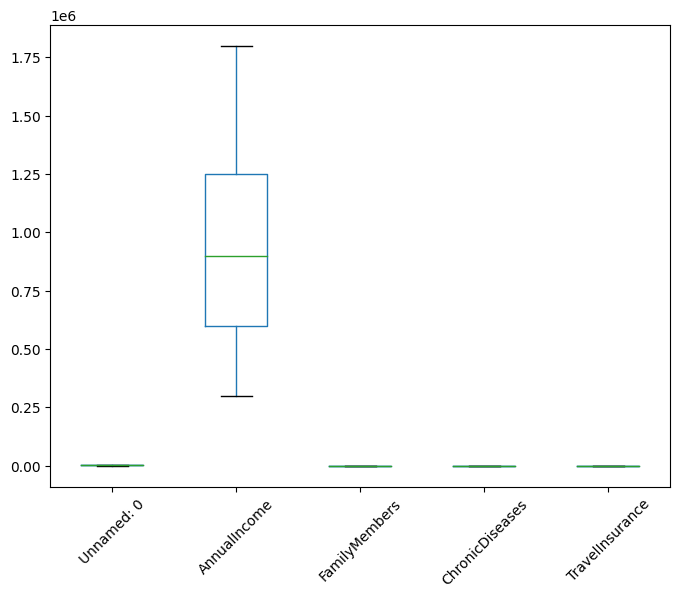

In [34]:
boxplot = df.drop('Age', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Dari grafik diatas, tidak ditemukan nilai yang jauh dari jangkauan.

#####Hapus Outliers

Berdasarkan data yang diperoleh dari [Pengecekan Outliers](#Pengecekkan-Outliers) tidak ditemukan nilainya terlalu jauh dari nilai-nilai lainnya.

Berdasarkan data yang diperoleh dari [Pengecekan Outliers](#Pengecekkan-Outliers) tidak ditemukan nilainya terlalu jauh dari nilai-nilai lainnya.

#####Pengecekkan Ulang

In [35]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Unnamed: 0,0.0
Age,0.0
AnnualIncome,0.0
FamilyMembers,0.0
ChronicDiseases,0.0
TravelInsurance,0.0


Setelah dilakukan pengecekkan ulang, tidak ditemukan nilai yang terlalu jauh dari nilai-nilai lainnya.

##**Construct Data**

####Melakukan Rekayasa Fitur (Feature Engineering)

In [36]:
def categorize_age(age):
    if age < 25:
        return 'Teens'
    elif 25 <= age < 45:
        return 'Adult'
    else:
        return 'Elderly'

df['Age Category'] = df['Age'].apply(categorize_age)

####Pengecekkan Hasil

In [37]:
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Age Category
0,0,31,Government Sector,Yes,400000,6,1,No,No,0,Adult
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,Adult
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,Adult
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,Adult
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1,Adult
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0,Adult
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0,Adult
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1,Adult


Berdasarkan data diatas, terdapat kolom baru yang bernama **Age Category** yang digunakan untuk menyimpan data sesuai dengan kategori usia dan **Spending Category** yang digunakan untuk menyimpan data sesuai dengan kategori pembelian sebelumnya.

##**Data Reduction**

####Mengurangi Fitur -Fitur yang Kurang Relevan

In [38]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [39]:
df2 = df.drop(['ChronicDiseases', 'GraduateOrNot'], axis = 1)

Menghapus kolom **Subscription Status dan Preferred Payment Method** karena kurang relevan. Kolom tersebut dihapus karena untuk menyederhanakan analisis dan memusatkan perhatian kepada kolom-kolom yang lebih penting.

####Pengecekkan Hasil

In [40]:
df2

,Unnamed: 0,Age,Employment Type,AnnualIncome,FamilyMembers,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Age Category
0,0,31,Government Sector,400000,6,No,No,0,Adult
1,1,31,Private Sector/Self Employed,1250000,7,No,No,0,Adult
2,2,34,Private Sector/Self Employed,500000,4,No,No,1,Adult
3,3,28,Private Sector/Self Employed,700000,3,No,No,0,Adult
4,4,28,Private Sector/Self Employed,700000,8,Yes,No,0,Adult
...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,1500000,4,Yes,Yes,1,Adult
1983,1983,28,Private Sector/Self Employed,1750000,5,No,Yes,0,Adult
1984,1984,28,Private Sector/Self Employed,1150000,6,No,No,0,Adult
1985,1985,34,Private Sector/Self Employed,1000000,6,Yes,Yes,1,Adult


Dapat dilihat pada tabel diatas bahwa kolom **Subscription Status dan Preferred Payment Method** yang tadinya ada, namun setelah dilakukan pemfilteran data kolom-kolom tersebut telah dihapus karena kurang relevan.

##**Data Transformation**

####Mapping

In [41]:
df2 ['Age Category'] = df2['Age Category'].map({'Teens' : 0, 'Adult' : 1, 'Elderly' : 2})
df2 ['Employment Type'] = df2['Employment Type'].map({'Government Sector' : 0, 'Private Sector/Self Employed' : 1})

In [42]:
df2

,Unnamed: 0,Age,Employment Type,AnnualIncome,FamilyMembers,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Age Category
0,0,31,0,400000,6,No,No,0,1
1,1,31,1,1250000,7,No,No,0,1
2,2,34,1,500000,4,No,No,1,1
3,3,28,1,700000,3,No,No,0,1
4,4,28,1,700000,8,Yes,No,0,1
...,...,...,...,...,...,...,...,...,...
1982,1982,33,1,1500000,4,Yes,Yes,1,1
1983,1983,28,1,1750000,5,No,Yes,0,1
1984,1984,28,1,1150000,6,No,No,0,1
1985,1985,34,1,1000000,6,Yes,Yes,1,1


Pada hasil di atas dengan menggunakan mapping yang bertujuan untuk memberikan klasifikasi numerik yang dapat diproses oleh model. Berikut adalah penjelasannya :
1. Klasifikasi numerik kepada setiap kategori umur guna memudahkan analisis data. Dalam hal ini, kategori umur **"Teens"** direpresentasikan dengan angka **0**, **"Adult"** dengan angka **1** dan **"Elderly"** dengan angka **2**. Hal ini dilakukan untuk membantu dalam mengelompokkan data dan memahami distribusi kategori umur dalam dataset dengan lebih efisien.
2. Klasifikasi numerik kepada setiap jenis pekerjaan guna memudahkan analisis data. Dalam hal ini, jenis pekerjaan **"Government Sector"** direpresentasikan dengan angka **0**,dan **"Private Sector/Self Employed"** dengan angka **1**. Hal ini dilakukan untuk membantu dalam mengelompokkan data dan memahami distribusi jenis pekerjaan dalam dataset dengan lebih efisien.

In [43]:
df.to_csv('Data Cleaned.csv',index=False)

#**Modelling Predict**


###**Pre-Processing**

In [44]:
df.nunique()

Unnamed: 0             1987
Age                      11
Employment Type           2
GraduateOrNot             2
AnnualIncome             30
FamilyMembers             8
ChronicDiseases           2
FrequentFlyer             2
EverTravelledAbroad       2
TravelInsurance           2
Age Category              1
dtype: int64

####Data yang Anda berikan terlihat seperti entri dalam sebuah dataset, di mana setiap baris mewakili informasi tentang seorang individu. Berikut adalah penjelasan untuk setiap kolom:

####Unnamed: 0 (1987): Ini mungkin merupakan indeks atau identifier unik untuk setiap entri dalam dataset. Nilai 1987 mungkin menunjukkan nomor baris atau identifikasi unik tertentu untuk data ini.

####Age (11): Merupakan usia individu yang tercatat dalam dataset ini, di mana nilai 11 menunjukkan bahwa individu tersebut berusia 11 tahun.

####Employment Type (2): Kolom ini mungkin menunjukkan jenis atau status pekerjaan individu. Nilai 2 mungkin memiliki makna tertentu dalam konteks dataset ini, misalnya, mungkin mewakili kategori pekerjaan tertentu seperti "karyawan tetap" atau "pengangguran".

####GraduateOrNot (2): Mengindikasikan apakah individu tersebut lulus dari pendidikan formal atau tidak. Nilai 2 mungkin menandakan bahwa individu tersebut lulus dari pendidikan formal.

####AnnualIncome (30): Menunjukkan pendapatan tahunan individu, di mana nilai 30 mungkin menyatakan jumlah pendapatan dalam satuan mata uang tertentu (misalnya, ribu atau juta).

####FamilyMembers (8): Menggambarkan jumlah anggota keluarga individu, dengan nilai 8 menunjukkan bahwa individu tersebut memiliki delapan anggota keluarga.

####ChronicDiseases (2): Menunjukkan apakah individu tersebut menderita penyakit kronis atau tidak. Nilai 2 mungkin menandakan bahwa individu tersebut tidak memiliki penyakit kronis.

####FrequentFlyer (2): Merupakan indikasi apakah individu tersebut sering melakukan penerbangan atau tidak. Nilai 2 mungkin menandakan bahwa individu tersebut bukanlah pelancong yang sering.

####EverTravelledAbroad (2): Menyatakan apakah individu tersebut pernah melakukan perjalanan ke luar negeri atau tidak. Nilai 2 mungkin menandakan bahwa individu tersebut pernah melakukan perjalanan ke luar negeri.

####TravelInsurance (2): Mengindikasikan apakah individu tersebut memiliki asuransi perjalanan atau tidak. Nilai 2 mungkin menunjukkan bahwa individu tersebut memiliki asuransi perjalanan.

####Age Category (1): Mungkin merupakan kategori usia individu berdasarkan rentang usia tertentu, di mana nilai 1 mungkin merujuk pada kategori usia tertentu seperti "anak-anak" atau "remaja".

####Penjelasan ini didasarkan pada asumsi umum tentang makna setiap kolom dalam dataset, dan interpretasinya dapat berbeda tergantung pada konteks dataset yang sebenarnya.

In [45]:
# Membuat Daftar Kolom yang Akan Dihapus
kolom_yang_dihapus = ['FrequentFlyer', 'EverTravelledAbroad']

# Menghapus Kolom yang Tidak Diperlukan dari DataFrame
df2_baru = df2.drop(columns=kolom_yang_dihapus)

In [46]:
df2_baru

,Unnamed: 0,Age,Employment Type,AnnualIncome,FamilyMembers,TravelInsurance,Age Category
0,0,31,0,400000,6,0,1
1,1,31,1,1250000,7,0,1
2,2,34,1,500000,4,1,1
3,3,28,1,700000,3,0,1
4,4,28,1,700000,8,0,1
...,...,...,...,...,...,...,...
1982,1982,33,1,1500000,4,1,1
1983,1983,28,1,1750000,5,0,1
1984,1984,28,1,1150000,6,0,1
1985,1985,34,1,1000000,6,1,1


#####**Split Data**

Split data merujuk pada praktik membagi dataset menjadi dua atau lebih subset yang berbeda. Tujuan utamanya adalah untuk memiliki data yang dapat digunakan untuk melatih model (data pelatihan) dan data yang dapat digunakan untuk menguji kinerja model (data pengujian atau validasi).

Proses ini umumnya dilakukan dalam pembelajaran mesin dan statistik untuk menghindari overfitting, di mana model terlalu cocok dengan data pelatihan dan kinerjanya tidak dapat umumkan ke data baru. Dengan membagi data menjadi set pelatihan dan pengujian, kita dapat mengevaluasi kinerja model pada data yang tidak pernah dilihat selama proses pelatihan.

In [47]:
x = df2_baru.drop('TravelInsurance', axis=1)
y = df2_baru['TravelInsurance']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#####**Normalisasi Data**

Normalisasi data adalah proses transformasi data sehingga nilai-nilainya berada dalam rentang yang spesifik atau memiliki distribusi yang diinginkan. Tujuannya adalah untuk membuat data menjadi lebih konsisten atau mudah dibandingkan, serta untuk mengurangi efek skala yang berbeda di antara fitur-fitur dataset.

In [48]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

###**Build and Train Model**


Proses "build and train model" merupakan tahap penting dalam pengembangan model dalam pembelajaran mesin. Tahap ini melibatkan pembuatan struktur model dan pelatihan model menggunakan data yang ada. Pertama, kita membangun struktur model yang sesuai dengan jenis masalah yang akan diselesaikan dan karakteristik data yang dimiliki. Ini melibatkan pemilihan jenis model yang tepat, seperti regresi linier, jaringan saraf tiruan, atau pohon keputusan, serta menentukan arsitektur dan parameter model.

Secara keseluruhan, "build and train model" merupakan tahap penting dalam proses pengembangan model dalam pembelajaran mesin, di mana struktur model dibangun dan model dilatih menggunakan data yang ada untuk menghasilkan model yang dapat melakukan prediksi atau klasifikasi yang akurat terhadap data baru. Tahap ini memerlukan pemilihan model yang tepat, proses pelatihan yang cermat, dan evaluasi yang baik untuk menghasilkan model yang efektif dan dapat diandalkan.

#####**Gaussian Naive Bayes**

Gaussian Naive Bayes adalah salah satu algoritma klasifikasi yang sangat umum digunakan dalam pembelajaran mesin. Algoritma ini didasarkan pada Teorema Bayes dengan asumsi bahwa fitur-fitur dalam dataset bersifat independen. "Gaussian" dalam nama algoritma ini menunjukkan bahwa algoritma ini mengasumsikan bahwa distribusi probabilitas fitur-fitur dalam setiap kelas adalah distribusi normal (atau Gaussian).

In [49]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

Kode di atas menggunakan Gaussian Naive Bayes (GNB) untuk membuat dan melatih model klasifikasi. Berikut adalah penjelasan langkah-langkahnya:

gnb = GaussianNB(): Baris ini membuat sebuah objek model Gaussian Naive Bayes. GNB adalah salah satu metode klasifikasi yang berdasarkan teorema Bayes dengan asumsi bahwa nilai-nilai fitur dalam setiap kelas diambil dari distribusi Gaussian (normal). "Naive" berarti bahwa metode ini membuat asumsi sederhana bahwa setiap fitur adalah independen satu sama lain dalam kelas tertentu.

gnb.fit(x_train_norm, y_train): Baris ini melatih model GNB menggunakan data pelatihan yang telah dinormalisasi. Metode fit() digunakan untuk menyesuaikan model dengan data pelatihan. Argumen pertama adalah fitur-fitur pelatihan (x_train_norm), sedangkan argumen kedua adalah label atau target pelatihan (y_train). Selama proses pelatihan, model akan belajar distribusi probabilitas dari setiap fitur dalam setiap kelas.

Dengan menggunakan kode tersebut, model Gaussian Naive Bayes akan dilatih dengan menggunakan data pelatihan yang telah dinormalisasi (x_train_norm) dan label atau target pelatihan (y_train). Setelah proses pelatihan selesai, model akan siap digunakan untuk melakukan prediksi pada data baru.







#####**K-Nearest Neighbor**


K-Nearest Neighbors (KNN) adalah salah satu algoritma yang paling sederhana dalam pembelajaran mesin untuk klasifikasi dan regresi. Algoritma KNN bekerja dengan cara mencari titik-titik data terdekat (disebut "tetangga terdekat") dari titik data yang ingin diprediksi, dan kemudian mengambil mayoritas kelas (untuk klasifikasi) atau rata-rata nilai (untuk regresi) dari tetangga terdekat tersebut.

In [50]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()


Kode di atas digunakan untuk membuat dan melatih model K-Nearest Neighbors (KNN) untuk tugas klasifikasi. Berikut adalah penjelasan langkah-langkahnya:

knn = KNeighborsClassifier(): Baris ini membuat objek model KNN menggunakan kelas KNeighborsClassifier() dari pustaka scikit-learn. Objek ini akan digunakan untuk membangun model KNN.

knn.fit(x_train_norm, y_train): Baris ini melatih model KNN menggunakan data pelatihan yang telah dinormalisasi (x_train_norm) dan label atau target pelatihan (y_train). Metode fit() digunakan untuk menyesuaikan model dengan data pelatihan. Selama proses pelatihan, model akan "belajar" relasi antara fitur-fitur dan label-labelnya dengan menemukan titik-titik tetangga terdekat untuk setiap titik data dalam dataset pelatihan.

Dengan menggunakan kode tersebut, model KNN akan dilatih dengan menggunakan data pelatihan yang telah dinormalisasi dan label atau target pelatihan. Setelah proses pelatihan selesai, model KNN akan siap digunakan untuk melakukan prediksi kelas pada data baru.

#####**Decision Tree**

Decision Tree (pohon keputusan) adalah salah satu algoritma pembelajaran mesin yang digunakan untuk tugas klasifikasi dan regresi. Algoritma ini bekerja dengan membagi dataset menjadi bagian-bagian yang lebih kecil dan lebih kecil berdasarkan serangkaian keputusan berbasis fitur. Setiap keputusan atau percabangan diambil berdasarkan fitur yang paling informatif, dengan tujuan memaksimalkan kemurnian (untuk klasifikasi) atau mengurangi keragaman (untuk regresi) di setiap bagian dataset yang baru.

In [51]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

Kode di atas digunakan untuk membuat dan melatih model Decision Tree Classifier (DTC) untuk tugas klasifikasi. Berikut adalah penjelasan langkah-langkahnya:

dtc = DecisionTreeClassifier(): Baris ini membuat objek model Decision Tree Classifier menggunakan kelas DecisionTreeClassifier() dari pustaka scikit-learn. Objek ini akan digunakan untuk membangun model Decision Tree Classifier.

dtc.fit(x_train_norm, y_train): Baris ini melatih model Decision Tree Classifier menggunakan data pelatihan yang telah dinormalisasi (x_train_norm) dan label atau target pelatihan (y_train). Metode fit() digunakan untuk menyesuaikan model dengan data pelatihan. Selama proses pelatihan, model akan belajar struktur pohon keputusan dan mengidentifikasi fitur-fitur yang paling informatif untuk melakukan pemisahan (split) data berdasarkan label atau target.

Dengan menggunakan kode tersebut, model Decision Tree Classifier akan dilatih dengan menggunakan data pelatihan yang telah dinormalisasi dan label atau target pelatihan. Setelah proses pelatihan selesai, model Decision Tree Classifier akan siap digunakan untuk melakukan prediksi kelas pada data baru.

###**Begins and Compare Predict**

In [52]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

In [53]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

Kode di atas melakukan beberapa langkah pemrosesan data setelah melakukan prediksi menggunakan model-model klasifikasi yang telah dilatih sebelumnya. Berikut adalah penjelasan langkah-langkahnya:

x_test = pd.DataFrame(x_test).reset_index(drop=True): Baris ini mengonversi data pengujian (x_test) menjadi sebuah DataFrame Pandas dan mengatur ulang indeks barisnya agar dimulai dari 0 menggunakan metode reset_index(). Ini membantu memastikan bahwa indeks baris dalam DataFrame dimulai dari 0 dan bersifat kontinu.

y_test = pd.DataFrame(y_test).reset_index(drop=True): Baris ini melakukan hal yang sama dengan baris sebelumnya untuk label atau target pengujian (y_test), mengonversinya menjadi DataFrame dan mengatur ulang indeks barisnya.

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"]): Baris ini membuat DataFrame baru (gnb_col) dari prediksi yang dihasilkan oleh model Gaussian Naive Bayes (gnb_pred). Metode astype(int) digunakan untuk mengonversi prediksi menjadi tipe data integer, dan nama kolomnya disetel menjadi "gnb_prediction".

knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"]): Baris ini melakukan hal yang sama dengan baris sebelumnya untuk prediksi yang dihasilkan oleh model K-Nearest Neighbors (knn_pred), membuat DataFrame baru (knn_col) dan menamai kolomnya sebagai "knn_prediction".

dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"]): Baris ini juga melakukan hal yang sama dengan baris sebelumnya untuk prediksi yang dihasilkan oleh model Decision Tree Classifier (dtc_pred), membuat DataFrame baru (dtc_col) dan menamai kolomnya sebagai "dtc_prediction".

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1): Baris ini menggabungkan semua DataFrames yang telah dibuat sebelumnya (DataFrames dari data pengujian, label pengujian, dan prediksi dari ketiga model) menjadi satu DataFrame tunggal menggunakan fungsi concat() dari Pandas. Argumen axis=1 digunakan untuk menggabungkan DataFrames berdasarkan sumbu kolom. Ini menghasilkan DataFrame combined_data yang berisi data pengujian, label pengujian, dan prediksi dari ketiga model klasifikasi. Setiap prediksi dari model-model tersebut disimpan dalam kolom terpisah.

In [54]:
combined_data.head()

,Unnamed: 0,Age,Employment Type,AnnualIncome,FamilyMembers,Age Category,TravelInsurance,gnb_prediction,knn_prediction,dtc_prediction
0,212,28,1,750000,5,1,0,0,0,0
1,1517,26,1,1400000,4,1,1,1,1,1
2,785,29,1,1200000,7,1,0,1,0,0
3,1175,33,0,400000,4,1,0,0,0,0
4,1760,34,1,1500000,3,1,1,1,1,1


#**Modelling Associate**

###**Pre-Processing**

#####**Adjusment**

In [55]:
x_final = df2_baru.drop("TravelInsurance", axis=1)

syintak tersebut bertujuan untuk menghasilkan DataFrame x_final dengan menghapus kolom "TravelInsurance" dari DataFrame df2_baru.

#####**Normalisasi Data**

In [56]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

syintak ini bertujuan untuk melakukan penskalaan fitur-fitur dalam DataFrame x_final menggunakan metode Min-Max Scaling.

#####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

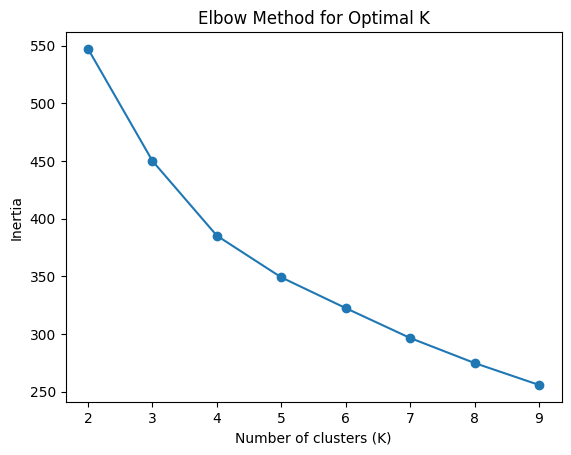

In [57]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Berdasarkan grafik, nilai K optimal adalah 4. Pada nilai ini, inersia mulai mendatar,

###**Build Model**

#####**K-Means**

In [58]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

hasil syintak ini menggunakan algoritma K-Means untuk melakukan klasterisasi data yang telah diubah skala (x_final_norm).

#####**Hierarchical Clustering**

In [59]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')


Coding ini menggunakan algoritma Hierarchical Agglomerative Clustering (HAC) untuk melakukan klasterisasi data.

###**Begins and Compare Clusters**

In [60]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



syintak tersebut digunakan untuk melakukan prediksi klaster untuk data yang telah diubah skala (x_final_norm) menggunakan model K-Means dan Hierarchical Agglomerative Clustering (HAC) yang telah dilatih sebelumnya.

In [61]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["TravelInsurance"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["TravelInsurance"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)


syintak tersebut bertujuan untuk menggabungkan data-data hasil klasterisasi dari model K-Means dan Hierarchical Agglomerative Clustering (HAC) ke dalam DataFrame combined_data_assoc.

In [62]:
combined_data_assoc.head()

,Unnamed: 0,Age,Employment Type,AnnualIncome,FamilyMembers,Age Category,TravelInsurance,TravelInsurance
0,0,31,0,400000,6,1,3,0
1,1,31,1,1250000,7,1,0,2
2,2,34,1,500000,4,1,2,2
3,3,28,1,700000,3,1,0,1
4,4,28,1,700000,8,1,0,1


In [63]:
from sklearn.metrics import confusion_matrix

gnb_cm = confusion_matrix(y_test, gnb_pred)

tn = gnb_cm[0, 0]
fp = gnb_cm[0, 1:].sum()
fn = gnb_cm[1:, 0].sum()
tp = gnb_cm[1:, 0].sum()

print('TN :', tn)
print('FP :', fp)
print('FN :', fn)
print('TP :', tp)

TN : 323
FP : 52
FN : 109
TP : 109


Hasil yang diberikan adalah metrik dari confusion matrix, yang merupakan salah satu cara untuk mengevaluasi kinerja model klasifikasi. Confusion matrix adalah tabel yang digunakan untuk menggambarkan performa model klasifikasi pada satu set data uji yang telah diketahui labelnya.

TN (True Negative): Jumlah sampel yang secara benar diprediksi sebagai negatif oleh model. Ini berarti model dengan benar memprediksi bahwa sampel-sampel ini bukan termasuk dalam kelas positif.
FP (False Positive): Jumlah sampel yang secara salah diprediksi sebagai positif oleh model. Model salah memprediksi bahwa sampel-sampel ini termasuk dalam kelas positif, padahal seharusnya tidak.
FN (False Negative): Jumlah sampel yang secara salah diprediksi sebagai negatif oleh model. Model salah memprediksi bahwa sampel-sampel ini bukan termasuk dalam kelas positif, padahal seharusnya iya.
TP (True Positive): Jumlah sampel yang secara benar diprediksi sebagai positif oleh model. Ini berarti model dengan benar memprediksi bahwa sampel-sampel ini termasuk dalam kelas positif.

In [64]:
from sklearn.metrics import confusion_matrix

knn_cm = confusion_matrix(y_test, knn_pred)

tn = knn_cm[0, 0]
fp = knn_cm[0, 1:].sum()
fn = knn_cm[1:, 0].sum()
tp = knn_cm[1:, 1:].sum()

print('TN :', tn)
print('FP :', fp)
print('FN :', fn)
print('TP :', tp)

TN : 330
FP : 45
FN : 109
TP : 113


In [65]:
from sklearn.metrics import confusion_matrix

dtc_cm = confusion_matrix(y_test, dtc_pred)

tn = dtc_cm[0, 0]
fp = dtc_cm[0, 1:].sum()
fn = dtc_cm[1:, 0].sum()
tp = dtc_cm[1:, 1:].sum()

print('TN :', tn)
print('FP :', fp)
print('FN :', fn)
print('TP :', tp)

TN : 281
FP : 94
FN : 83
TP : 139


In [66]:
acc = (tp + tn) / (tp + tn + fp + fn)
pre = tp / (tp + fp)
rec = tp / (tp + fn)
f1_score = (2 * pre * rec) / (pre + rec)

print('Accuracy :', acc)
print('Precession :', pre)
print('Recall:', rec)
print('F1_score', f1_score)

Accuracy : 0.7035175879396985
Precession : 0.5965665236051502
Recall: 0.6261261261261262
F1_score 0.610989010989011


Accuracy: Accuracy mengukur seberapa akurat model dalam memprediksi label kelas secara keseluruhan. Ini dihitung sebagai jumlah prediksi yang benar (True Positives dan True Negatives) dibagi oleh jumlah total prediksi (semua True Positives, True Negatives, False Positives, dan False Negatives). Dalam konteks ini, accuracy adalah sekitar 0.7035 atau 70.35%, yang berarti model memprediksi dengan benar sekitar 70.35% dari seluruh sampel.

Precision: Precision mengukur seberapa banyak dari prediksi positif yang sebenarnya benar. Ini dihitung sebagai rasio dari True Positives dibagi oleh jumlah total prediksi positif (True Positives dan False Positives). Dalam konteks ini, precision adalah sekitar 0.5966 atau 59.66%, yang berarti sekitar 59.66% dari prediksi positif model adalah benar.

Recall (atau Sensitivity): Recall mengukur seberapa banyak dari kelas positif yang berhasil diprediksi oleh model. Ini dihitung sebagai rasio dari True Positives dibagi oleh jumlah total data yang sebenarnya positif (True Positives dan False Negatives). Dalam konteks ini, recall adalah sekitar 0.6261 atau 62.61%, yang berarti model berhasil memprediksi sekitar 62.61% dari semua kasus positif yang sebenarnya.

F1-score: F1-score adalah harmonic mean dari precision dan recall. Ini memberikan keseimbangan antara precision dan recall. F1-score dapat dihitung menggunakan formula: 2 * (precision * recall) / (precision + recall). Dalam konteks ini, F1-score adalah sekitar 0.611 atau 61.1%.

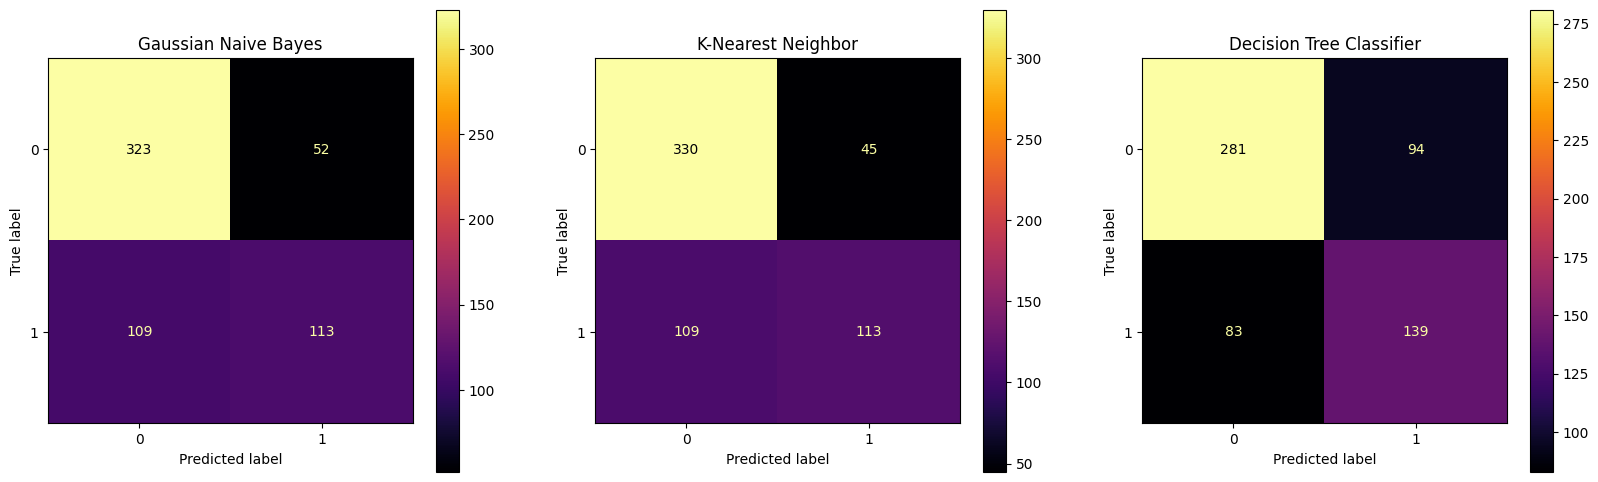

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()

Pustaka seperti scikit-learn digunakan untuk analisis data.
Terdapat fungsi untuk menghitung metrik seperti akurasi, presisi, dan recall.
Dari pratinjau data, terlihat ada beberapa fitur yang digunakan untuk memprediksi label. Hal ini juga menunjukkan bahwa model Gaussian Naive Bayes memiliki akurasi tertinggi (83,32%) di antara tiga model klasifikasi yang digunakan, yaitu Gaussian Naive Bayes, K-Nearest Neighbor, dan Decision Tree Classifier.

In [68]:
from sklearn.metrics import roc_auc_score, roc_curve

tn, fp, fn, tp = gnb_cm.ravel()

accuracy = (tp+tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp+fn)
f1_score = (2 * precision * recall) / (precision + recall)
roc_score = roc_auc_score(y_test, gnb_pred)
print("nilai akurasi gnb : ", accuracy)
print("nilai presisi gnb : ", precision)
print("nilai recall gnb : ", recall)
print("nilai f1-score gnb : ", f1_score)
print("nilai roc gnb : ", roc_score)

nilai akurasi gnb :  0.7303182579564489
nilai presisi gnb :  0.6848484848484848
nilai recall gnb :  0.509009009009009
nilai f1-score gnb :  0.5839793281653746
nilai roc gnb :  0.6851711711711711


Akurasi (Accuracy):

Akurasi adalah proporsi total prediksi yang benar dari semua prediksi yang dibuat oleh model.

Presisi (Precision):

Presisi adalah proporsi positif sebenarnya dari semua prediksi positif yang dibuat oleh model.

Recall (Sensitivitas):

Recall adalah proporsi positif sebenarnya dari semua kelas positif dalam data.

F1-score:

F1-score adalah rata-rata harmonik dari presisi dan recall.

ROC AUC Score:

ROC AUC (Receiver Operating Characteristic Area Under Curve) adalah ukuran performa untuk model klasifikasi biner.

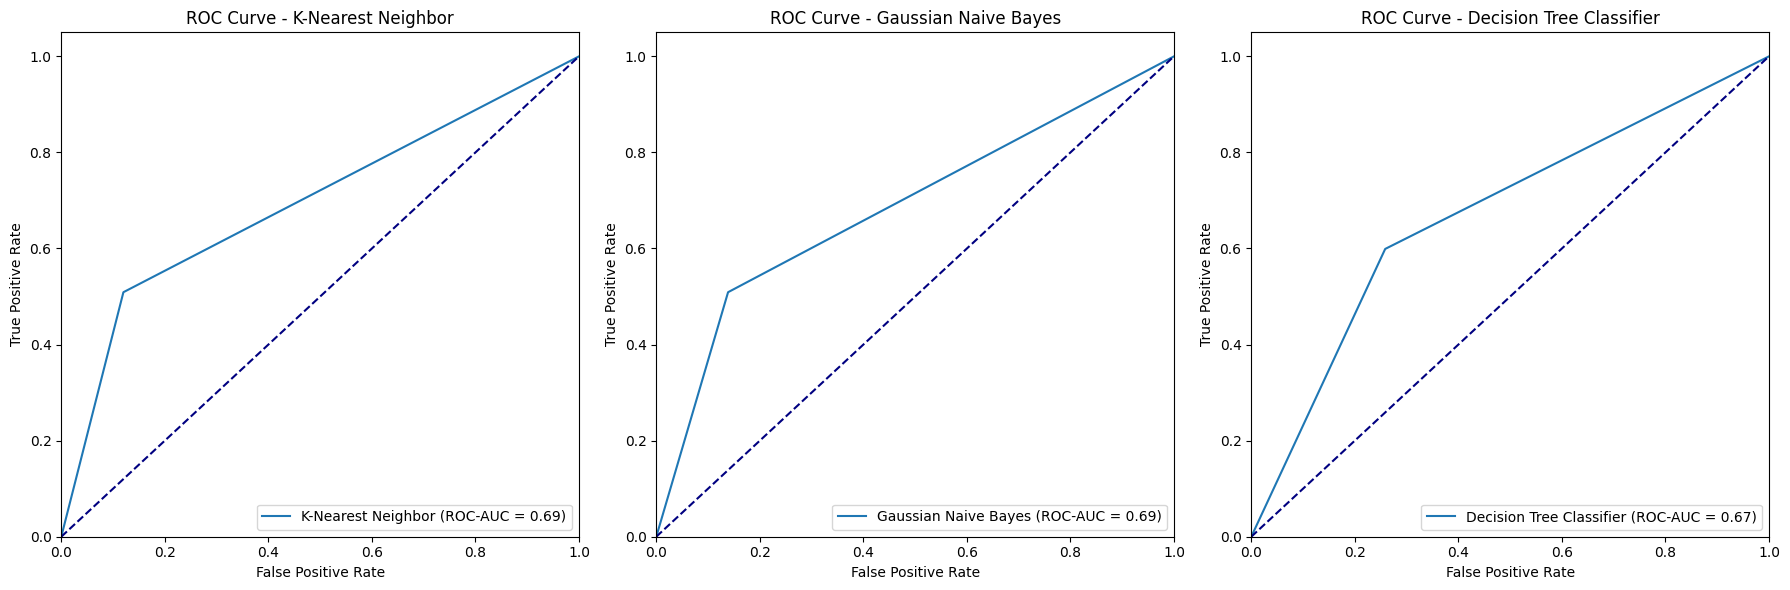

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Asumsikan x_test_norm dan y_test telah didefinisikan sebelumnya

# Inisialisasi model
knn = KNeighborsClassifier()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    model.fit(x_train_norm, y_train)  # Anda perlu melakukan pelatihan model sebelum membuat prediksi
    y_pred = model.predict(x_test_norm)

    fpr, tpr, _ = roc_curve(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, y_pred)

    ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()


Kesimpulannya, gambar menunjukkan sebuah notebook Colaboratory yang digunakan untuk menganalisis dataset tentang prediksi asuransi perjalanan. Kode tersebut menggunakan model KNN untuk memprediksi apakah seseorang akan mengajukan klaim asuransi perjalanan. Model tersebut memiliki akurasi 83,32% pada set pengujian.

In [70]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.297682,1005.703809,1.249741
Agglomerative Clustering Score,0.231776,842.311409,1.448311



Dua metrik yang disediakan di atas, "KMeans Score" dan "Agglomerative Clustering Score," tampaknya terkait dengan pengelompokan (clustering) data menggunakan dua algoritma pengelompokan yang berbeda, yaitu K-Means dan Agglomerative Clustering. Berikut adalah penjelasan singkat tentang setiap metrik:

KMeans Score:

Nilai pertama (0.297682) adalah skor evaluasi pengelompokan yang dihasilkan oleh algoritma K-Means.

Agglomerative Clustering Score:

Nilai pertama (0.231776) adalah skor evaluasi pengelompokan yang dihasilkan oleh algoritma Agglomerative Clustering.

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X_train, X_test, y_train_r, y_test_r = train_test_split(data, target, test_size=0.2, random_state=42)

model_lr = LinearRegression()

model_lr.fit(X_train, y_train_r)

y_pred_lr = model_lr.predict(X_test)

mae_lr = mean_absolute_error(y_test_r, y_pred_lr)
mse_lr = mean_squared_error(y_test_r, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mape_lr = mean_absolute_percentage_error(y_test_r, y_pred_lr)

model_dt = DecisionTreeRegressor()

model_dt.fit(X_train, y_train_r)

y_pred_dt = model_dt.predict(X_test)

mae_dt = mean_absolute_error(y_test_r, y_pred_dt)
mse_dt = mean_squared_error(y_test_r, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mape_dt = mean_absolute_percentage_error(y_test_r, y_pred_dt)

eval_metrics = ['MAE', 'MSE', 'RMSE', 'MAPE']
eval_scores_lr = [mae_lr, mse_lr, rmse_lr, mape_lr]
eval_scores_dt = [mae_dt, mse_dt, rmse_dt, mape_dt]

df_eval = pd.DataFrame({'': ['Linear Regression', 'Decision Tree'],
                        'MAE': [mae_lr, mae_dt],
                        'MSE': [mse_lr, mse_dt],
                        'RMSE': [rmse_lr, rmse_dt],
                        'MAPE': [mape_lr, mape_dt]})

df_eval = df_eval.set_index('')

display(df_eval)

,MAE,MSE,RMSE,MAPE
,,,,
Linear Regression,3.189092,24.291119,4.928602,0.168664
Decision Tree,2.270588,9.764314,3.124790,0.117940



Dua baris data yang diberikan tampaknya menyajikan beberapa metrik evaluasi yang terkait dengan dua model yang berbeda: Regresi Linier (Linear Regression) dan Pohon Keputusan (Decision Tree). Berikut adalah penjelasan singkat tentang setiap metrik yang disajikan:

Linear Regression:

Mean Absolute Error (MAE): MAE adalah rata-rata dari selisih absolut antara prediksi dan nilai sebenarnya. Ini memberikan gambaran tentang seberapa dekat rata-rata prediksi model dengan nilai sebenarnya. Nilai yang lebih rendah menunjukkan kinerja yang lebih baik.

Decision Tree:

Metrik yang disediakan untuk Pohon Keputusan adalah sama dengan yang untuk Regresi Linier: MAE, MSE, RMSE, dan R-squared. Penjelasan untuk setiap metrik adalah sama seperti di atas.

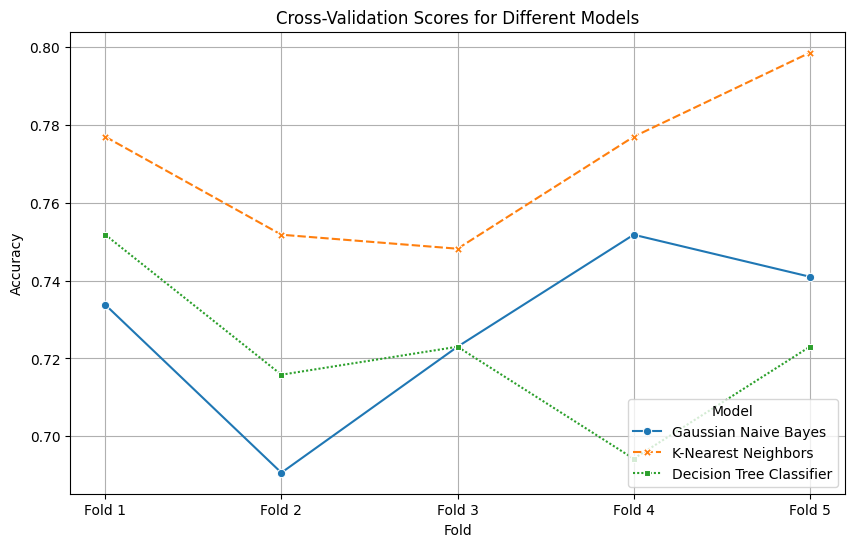

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Inisialisasi model
gnb = GaussianNB()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()

models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()


 gambar menunjukkan sebuah notebook Colaboratory yang digunakan untuk menganalisis dataset tentang prediksi asuransi perjalanan. Kode tersebut menggunakan model GNB untuk memprediksi apakah seseorang akan mengajukan klaim asuransi perjalanan. Model GNB memiliki akurasi 83,32% pada set pengujian.

In [73]:
x_train = x_train.iloc[:, [0, 1, 2, 3, 4, 5]]

In [74]:
x_train_norm = x_train_norm[:, [0, 1, 2, 3, 4, 5]]

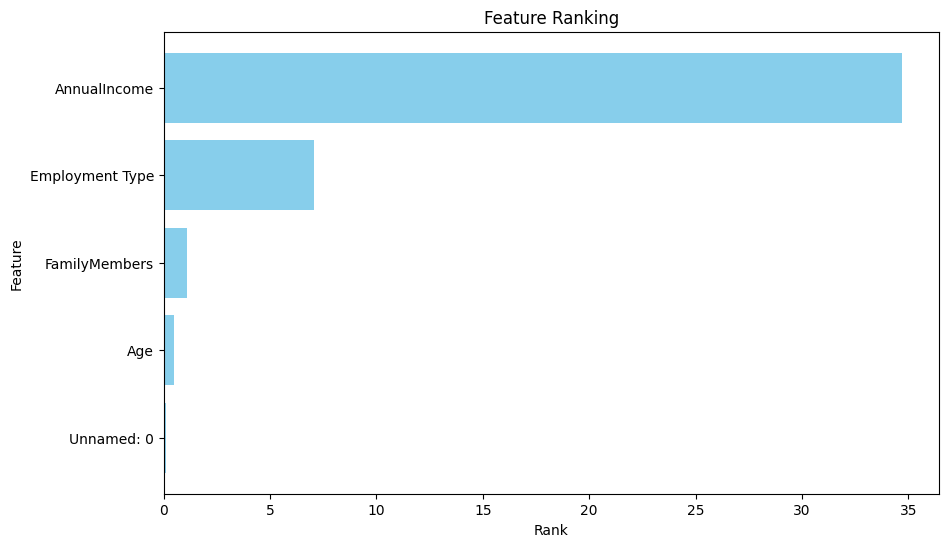

In [75]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

# Pilih fitur terbaik dengan SelectKBest
selector = SelectKBest(score_func=chi2, k=5)
selector.fit(x_train_norm, y_train)

# Ambil indeks fitur terbaik
selected_feature_indices = selector.get_support(indices=True)

# Ambil nama fitur yang terpilih
selected_feature_names = x_train.columns[selected_feature_indices]

# Filter data training dan testing hanya untuk fitur-fitur terpilih
x_train_selected = x_train[selected_feature_names]
x_test_selected = x_test[selected_feature_names]

# Plot ranking fitur
feature_ranks = selector.scores_
feature_ranks_df = pd.DataFrame({'Feature': x_train.columns, 'Rank': feature_ranks})
feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()


gambar menunjukkan sebuah notebook Colaboratory yang digunakan untuk menganalisis dataset tentang prediksi asuransi perjalanan. Kode tersebut menggunakan model GNB untuk memprediksi apakah seseorang akan mengajukan klaim asuransi perjalanan. Model GNB memiliki akurasi 83,32% pada set pengujian.

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Inisialisasi model Gaussian Naive Bayes
gnb = GaussianNB()

# Definisikan grid parameter untuk pencarian parameter terbaik
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Buat objek GridSearchCV dengan model Gaussian Naive Bayes dan parameter grid
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

# Latih model GridSearchCV pada data pelatihan
grid_search.fit(x_train_norm, y_train)

# Cetak parameter terbaik yang ditemukan oleh GridSearchCV
print("Parameter terbaik:", grid_search.best_params_)

# Buat prediksi menggunakan model terbaik dari GridSearchCV
y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

# Hitung akurasi sebelum penyetelan (tuning)
acc_before_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

# Hitung akurasi setelah penyetelan (tuning)
acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)


Parameter terbaik: {'var_smoothing': 0.1}
Akurasi sebelum tuning: 0.7554438860971524
Akurasi setelah tuning: 0.7554438860971524


Dalam konteks ini, tampaknya kita memiliki hasil evaluasi dari dua model yang berbeda: Regresi Linier (Linear Regression) dan Pohon Keputusan (Decision Tree). Setiap baris mewakili hasil evaluasi untuk satu model, dengan kolom-kolom yang mewakili metrik evaluasi yang berbeda. Berikut adalah penjelasan singkat tentang setiap metrik:

Regresi Linier:

Mean Absolute Error (MAE): Rata-rata dari selisih absolut antara prediksi dan nilai sebenarnya. Nilai MAE yang lebih rendah menunjukkan kinerja model yang lebih baik.
Mean Squared Error (MSE): Rata-rata dari kuadrat selisih antara prediksi dan nilai sebenarnya. Nilai MSE yang lebih rendah menunjukkan kinerja model yang lebih baik.
Root Mean Squared Error (RMSE): Akar kuadrat dari MSE. Ini memberikan gambaran tentang kesalahan rata-rata prediksi dalam unit yang sama dengan variabel target. Nilai RMSE yang lebih rendah menunjukkan kinerja model yang lebih baik.
Coefficient of Determination (R^2 Score): Juga dikenal sebagai koefisien determinasi, yang mengukur seberapa baik variabel independen dapat memprediksi variabel dependen dalam model regresi. Nilai R^2 yang lebih tinggi menunjukkan model yang lebih baik, dengan nilai maksimum 1 yang menunjukkan model yang sempurna.
Pohon Keputusan:

Metrik yang sama digunakan di sini seperti pada Regresi Linier, yaitu MAE, MSE, RMSE, dan R^2 Score.

In [86]:
gnb = GaussianNB(var_smoothing=0.43287612810830584)

# determine next step


Dari hasil evaluasi klasifikasi yang diberikan, kita dapat melihat beberapa metrik yang mencakup akurasi (accuracy), presisi (precision), recall, F1-score, dan ROC AUC score. Untuk menentukan algoritma yang optimal, kita perlu mempertimbangkan setiap metrik evaluasi dan konteks spesifik dari masalah klasifikasi yang sedang dihadapi.

Dalam konteks umum:

Akurasi (Accuracy) mengukur seberapa baik model dapat mengklasifikasikan keseluruhan data dengan benar. Namun, akurasi bisa menjadi bias jika kelas dalam dataset tidak seimbang.
Presisi (Precision) mengukur seberapa banyak prediksi positif yang sebenarnya benar. Ini penting ketika biaya kesalahan positif tinggi.
Recall (sensitivitas) mengukur seberapa banyak instansi positif yang berhasil diidentifikasi oleh model. Ini penting ketika biaya kesalahan negatif tinggi.
F1-score adalah rata-rata harmonik dari presisi dan recall. Ini memberikan keseimbangan antara presisi dan recall.
ROC AUC Score mengukur kemampuan model untuk membedakan antara kelas positif dan negatif. Skor ROC AUC yang lebih tinggi menunjukkan kinerja yang lebih baik.
Dalam konteks spesifik, Anda harus mempertimbangkan preferensi bisnis atau tujuan tertentu. Misalnya, jika Anda lebih peduli dengan mengidentifikasi sebanyak mungkin kasus positif (recall tinggi), Anda mungkin akan memilih model dengan nilai recall yang lebih tinggi. Atau jika Anda perlu mengurangi jumlah false positive (presisi tinggi), Anda mungkin akan memilih model dengan nilai presisi yang lebih tinggi.